Implementing Grid Search on keras, based on this <a href="https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/"> tutorial</a> 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris["data"]
y = iris["target"]

In [3]:
df = pd.concat([pd.DataFrame(iris["data"], columns=iris["feature_names"]),pd.DataFrame(y,columns=["species"])], axis=1)

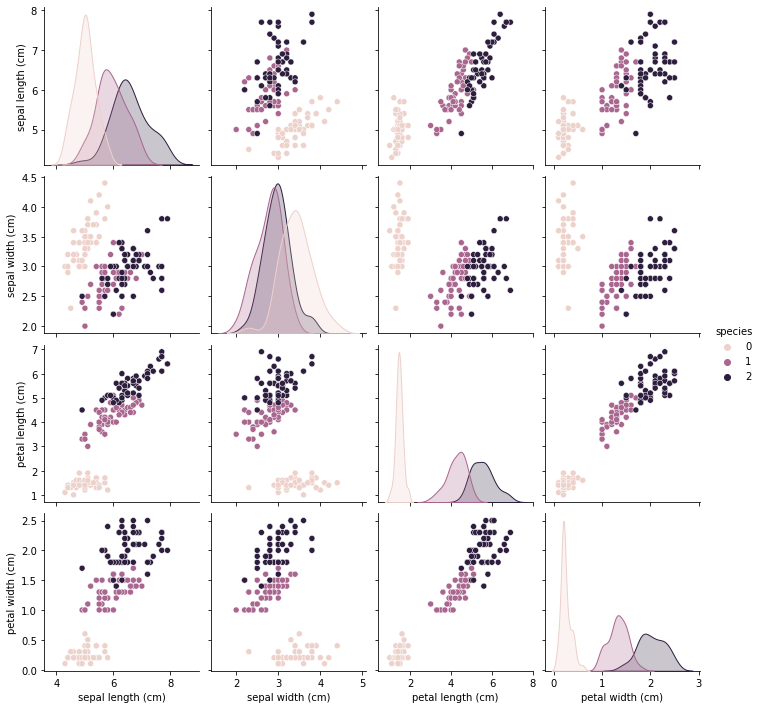

In [4]:
sns.pairplot(df, hue="species")

The class variable is very imbalanced.

We split the dataset into train and test. We shuffle the examples as the order is not important here.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

n_class_var = len(np.unique(y))

y = keras.utils.to_categorical(y, num_classes=n_class_var)

We scale with the Standard Scaler. That is the features are normalized. Models usually work better when this is the case.

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

The model's architecture. 

In [7]:
def create_model(optimizer="sgd"):
    model = keras.Sequential(
        [
            keras.layers.Dense(
                8, activation="relu", input_shape=(X.shape[-1],)
            ),
            keras.layers.Dense(12, activation="relu"),
            keras.layers.Dense(8, activation="relu"),
            keras.layers.Dense(n_class_var, activation="softmax")
        ]
    )
    model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=['accuracy']
    )
    return model

Epoch 1/20
108/108 [==============================] - 0s 3ms/step - loss: 1.0546 - accuracy: 0.4907 - val_loss: 0.8447 - val_accuracy: 0.8333
Epoch 2/20
108/108 [==============================] - 0s 788us/step - loss: 0.8642 - accuracy: 0.6574 - val_loss: 0.5701 - val_accuracy: 0.8333
Epoch 3/20
108/108 [==============================] - 0s 776us/step - loss: 0.7158 - accuracy: 0.7222 - val_loss: 0.4779 - val_accuracy: 0.8333
Epoch 4/20
108/108 [==============================] - 0s 795us/step - loss: 0.6420 - accuracy: 0.7963 - val_loss: 0.4303 - val_accuracy: 0.9167
Epoch 5/20
108/108 [==============================] - 0s 720us/step - loss: 0.5949 - accuracy: 0.7963 - val_loss: 0.3949 - val_accuracy: 0.9167
Epoch 6/20
108/108 [==============================] - 0s 774us/step - loss: 0.5554 - accuracy: 0.8148 - val_loss: 0.3616 - val_accuracy: 0.9167
Epoch 7/20
108/108 [==============================] - 0s 730us/step - loss: 0.5148 - accuracy: 0.8148 - val_loss: 0.3247 - val_accuracy: 0

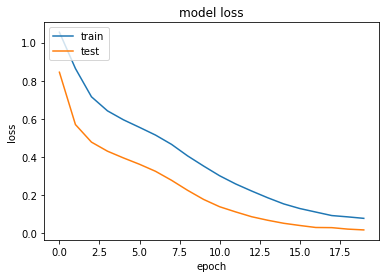

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

model = create_model()
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=1, epochs=20)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = np.argmax(model.predict(X_test), axis=1)

print(accuracy_score(np.argmax(y_test, axis=1), y_pred))

print(classification_report(np.argmax(y_test, axis=1), y_pred))

0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      0.70      0.78        10
           2       0.77      1.00      0.87        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.86        30
weighted avg       0.88      0.87      0.86        30



Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 1.0336 - accuracy: 0.3100 - val_loss: 0.9546 - val_accuracy: 0.4167
Epoch 2/20
100/100 [==============================] - 0s 836us/step - loss: 0.8405 - accuracy: 0.6500 - val_loss: 0.7681 - val_accuracy: 0.6667
Epoch 3/20
100/100 [==============================] - 0s 888us/step - loss: 0.6205 - accuracy: 0.7100 - val_loss: 0.5663 - val_accuracy: 0.6667
Epoch 4/20
100/100 [==============================] - 0s 831us/step - loss: 0.4806 - accuracy: 0.7500 - val_loss: 0.4617 - val_accuracy: 0.8333
Epoch 5/20
100/100 [==============================] - 0s 787us/step - loss: 0.4259 - accuracy: 0.8400 - val_loss: 0.4049 - val_accuracy: 0.9167
Epoch 6/20
100/100 [==============================] - 0s 973us/step - loss: 0.3806 - accuracy: 0.8400 - val_loss: 0.3677 - val_accuracy: 0.9167
Epoch 7/20
100/100 [==============================] - 0s 869us/step - loss: 0.3386 - accuracy: 0.8700 - val_loss: 0.3139 - val_accuracy: 0

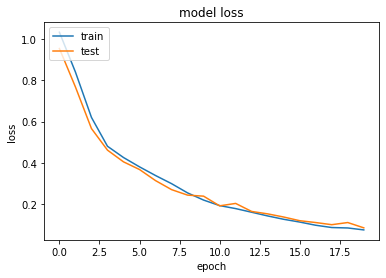

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = create_model("adam")
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=1, epochs=20)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = np.argmax(model.predict(X_test), axis=1)

print(accuracy_score(np.argmax(y_test, axis=1), y_pred))

print(classification_report(np.argmax(y_test, axis=1), y_pred))

0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.87      1.00      0.93        13
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



In [12]:
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [1, 4, 8]
epochs = [10, 20]
optimizers = ['SGD', 'Adam']
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizers) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END batch_size=1, epochs=10, optimizer=SGD;, score=1.000 total time=   0.8s
[CV 2/5] END batch_size=1, epochs=10, optimizer=SGD;, score=1.000 total time=   1.0s
[CV 3/5] END batch_size=1, epochs=10, optimizer=SGD;, score=0.600 total time=   0.8s
[CV 4/5] END batch_size=1, epochs=10, optimizer=SGD;, score=0.700 total time=   0.8s
[CV 5/5] END batch_size=1, epochs=10, optimizer=SGD;, score=0.833 total time=   0.8s
[CV 1/5] END batch_size=1, epochs=10, optimizer=Adam;, score=1.000 total time=   0.9s
[CV 2/5] END batch_size=1, epochs=10, optimizer=Adam;, score=0.867 total time=   1.2s
[CV 3/5] END batch_size=1, epochs=10, optimizer=Adam;, score=0.600 total time=   1.0s
[CV 4/5] END batch_size=1, epochs=10, optimizer=Adam;, score=0.933 total time=   1.0s
[CV 5/5] END batch_size=1, epochs=10, optimizer=Adam;, score=0.867 total time=   0.9s
[CV 1/5] END batch_size=1, epochs=20, optimizer=SGD;, score=1.000 total time=   1.5s

In [13]:
accuracy_score(grid.best_estimator_.predict(X_test), np.argmax(y_test, axis=1))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.9736842105263158

In [14]:
grid.best_params_

{'batch_size': 1, 'epochs': 20, 'optimizer': 'Adam'}